In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

In [2]:
x_all = pd.read_csv('x_all.csv')

In [3]:
y_all = pd.read_csv('y_all.csv')

In [4]:
x_all.head()

,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,3,1,22.0,7.2500,0,0,1,2
1,1,0,38.0,71.2833,1,0,0,2
2,3,0,26.0,7.9250,0,0,1,1
3,1,0,35.0,53.1000,0,0,1,2
4,3,1,35.0,8.0500,0,0,1,1


In [5]:
x_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         891 non-null    float64
 3   Fare        891 non-null    float64
 4   Embarked_C  891 non-null    int64  
 5   Embarked_Q  891 non-null    int64  
 6   Embarked_S  891 non-null    int64  
 7   FamilySize  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [6]:
y_all.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [7]:
y_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


### XGBoost and K-fold Validation

In [9]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [10]:
data_dmatrix = xgb.DMatrix(data=x_all,label=y_all)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_all, y_all, test_size=0.2, random_state=123)

In [14]:
model = xgb.XGBRegressor(objective ='reg:linear', 
                          colsample_bytree = 0.8, 
                          learning_rate = 0.1,
                          n_estimators = 1000,
                          eta=0.1,
                          max_depth =10)

In [15]:
model.fit(X_train,y_train)

preds = model.predict(X_test)

[17:14:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [16]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.356856


### k-fold Cross Validation using XGBoost

In [19]:
params = {"objective":"reg:linear",
          'colsample_bytree': 0.8,
          'learning_rate': 0.1,
          'max_depth': 10, 
          'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, 
                    params=params, 
                    nfold=3,
                    num_boost_round=50,
                    early_stopping_rounds=10,
                    metrics="rmse", 
                    as_pandas=True, 
                    seed=123)

[17:24:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[17:24:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[17:24:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [20]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.374158
Name: test-rmse-mean, dtype: float64


In [21]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[17:24:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


### Mothod 1

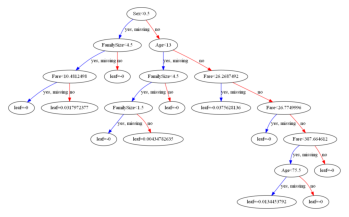

In [22]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

### Method 2

In [23]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt

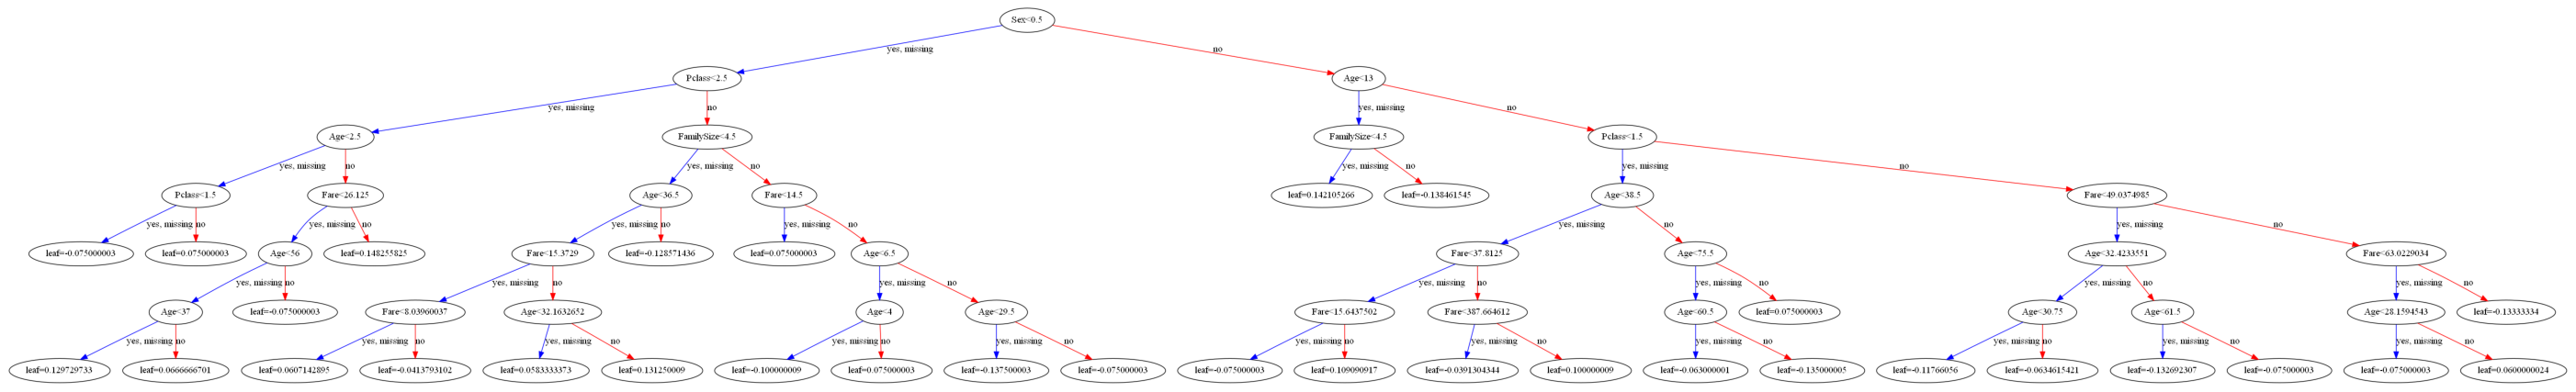

In [24]:
import xgboost as xgb
xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(X_train,y_train)

plot_tree(xgb_regressor)
plt.show()

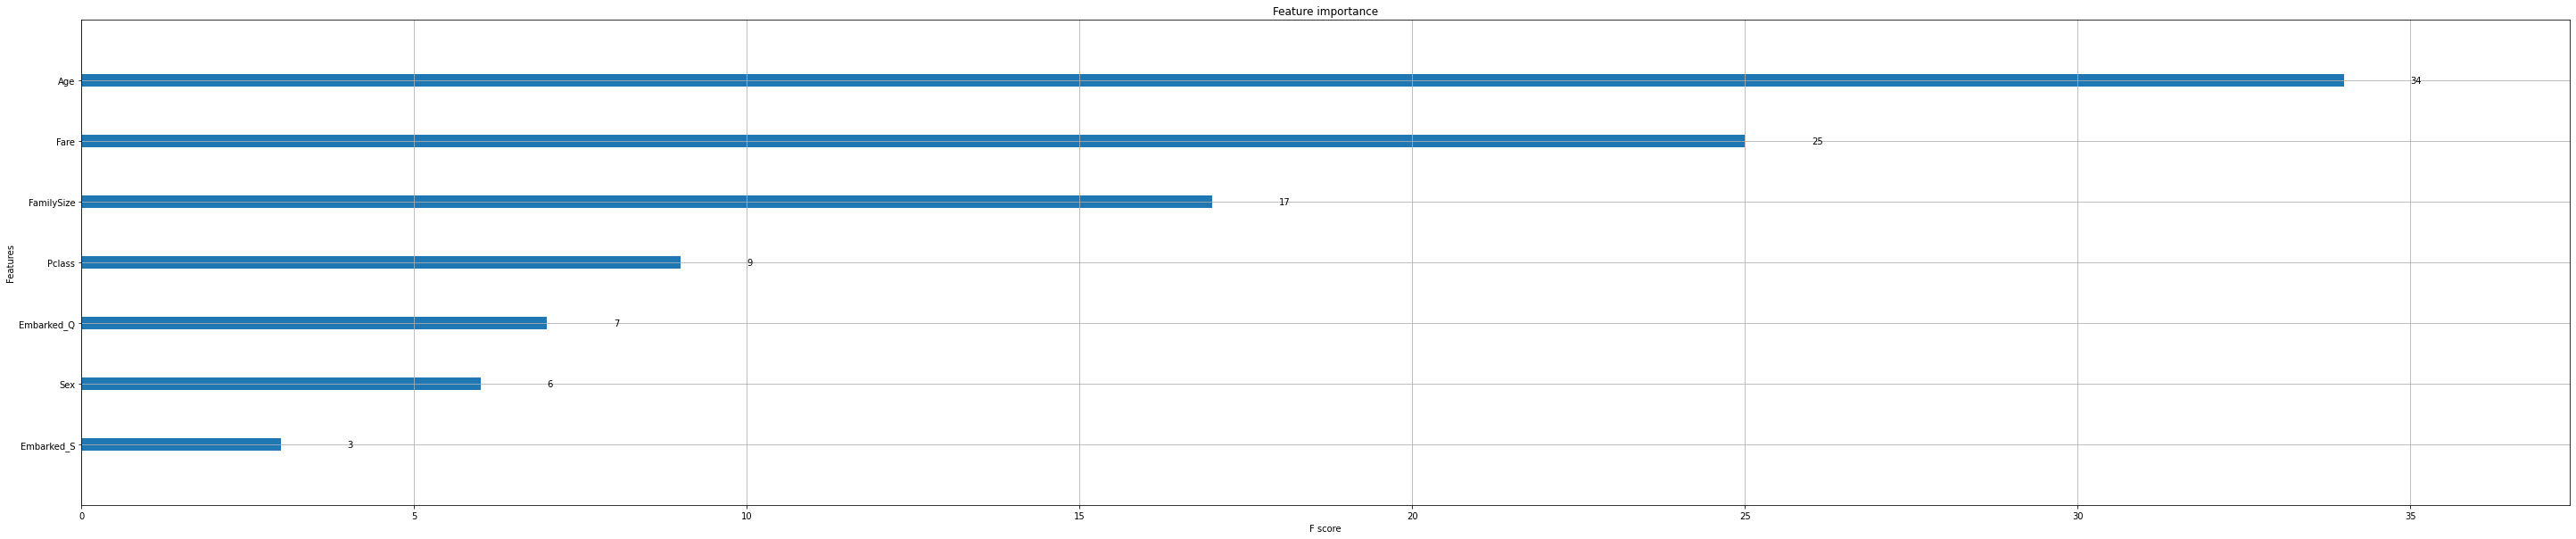

In [25]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

### Method 3

[17:25:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


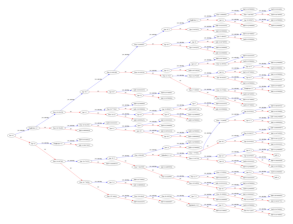

In [27]:
odel = XGBClassifier()
model.fit(X_train,y_train)

plot_tree(model, rankdir='LR')
plt.show()

### AUC curve

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

C:\Users\18202\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\18202\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [30]:
y_pred=logisticRegr.predict(X_test)

In [31]:
from sklearn.metrics import classification_report

In [32]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[99 15]
 [18 47]]


### Method 1: auc

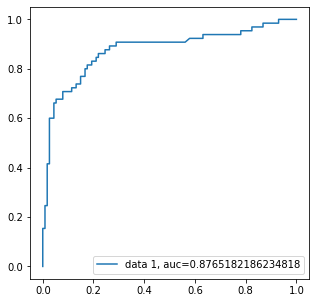

In [33]:
y_pred_proba = logisticRegr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Method 2: auc

AUC is:
0.8765182186234818


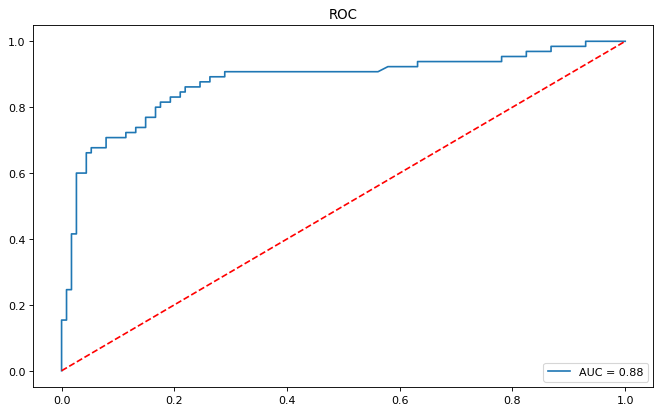

In [34]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_test,y_pred_proba)

# Calculate AUC (Area under curve) and ROC figure of the result

auc = metrics.auc(fpr, tpr)
print('AUC is:')
print(auc)
plt.figure(figsize=(10, 6), dpi=80)
plt.title('ROC')
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.show()